In [7]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50000)
pd.set_option('display.max_rows', 1000000)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.float_format',lambda x: '%.4f' % x)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.pyplot import figure
import matplotlib.pylab as pll
from collections import Counter
from datetime import datetime
import time
import random
import math
import os
import itertools
from matplotlib import ticker
import matplotlib.colors as colors
from pylab import rcParams

In [8]:
slurm1 = pd.read_csv('SlurmPlot2.csv')
slurm1.tail(100)

,Unnamed: 0,UID,Account,JobID,AllocCPUS,AllocNodes,AssocID,AveCPU,AveCPUFreq,AveDiskRead,AveDiskWrite,AvePages,AveRSS,AveVMSize,Cluster,ConsumedEnergyRaw,CPUTime,CPUTimeRAW,DBIndex,Elapsed,ElapsedRaw,Eligible,End,ExitCode,JobIDRaw,Layout,MaxDiskRead,MaxDiskReadNode,MaxDiskReadTask,MaxDiskWrite,MaxDiskWriteNode,MaxDiskWriteTask,MaxPages,MaxPagesNode,MaxPagesTask,MaxRSS,MaxRSSNode,MaxRSSTask,MaxVMSize,MaxVMSizeNode,MaxVMSizeTask,NCPUS,NNodes,NodeList,NTasks,Priority,Partition,QOS,QOSRAW,ReqCPUFreq,ReqCPUFreqMin,ReqCPUFreqMax,ReqCPUFreqGov,ReqCPUS,ReqMem,ReqNodes,Reservation,ReservationId,Reserved,ResvCPU,ResvCPURAW,Start,State,Submit,SystemCPU,Timelimit,TimelimitRaw,TotalCPU,UserCPU,TRESAllocEnergy,TRESBilling,TRESAllocMem,TRESAllocCPU,TRESINAveUsageCpu,TRESINAveUsageFsordisk,TRESINAveUsagemem,TRESINAveUsagevmem,TRESINAveUsagepages,TRESINMaxUsageFsordisk,TRESINMaxUsagemem,TRESINMaxUsagevmem,TRESINMaxUsagepages,TRESINMaxNodeUsageFsordisk,TRESINMaxNodeUsagemem,TRESINMaxNodeUsagevmem,TRESINMaxNodeUsagepages,TRESINMaxTaskUsageFsordisk,TRESINMaxTaskUsagemem,TRESINMaxTaskUsagevmem,TRESINMaxTaskUsagepages,TRESOutAveUsageCpu,TRESOutAveUsageFsordisk,TRESOutAveUsagemem,TRESOutAveUsagevmem,TRESOutAveUsagepages,TRESOutMaxUsageFsordisk,TRESOutMaxUsagemem,TRESOutMaxUsagevmem,TRESOutMaxUsagepages,TRESOutMaxNodeUsageFsordisk,TRESOutMaxNodeUsagemem,TRESOutMaxNodeUsagevmem,TRESOutMaxNodeUsagepages,TRESOutMaxTaskUsageFsordisk,TRESOutMaxTaskUsagemem,TRESOutMaxTaskUsagevmem,TRESOutMaxTaskUsagepages,AveCPUtime,Reservedtime,TotalCPUtime,UserCPUtime,SystemCPUtime,Endtimestamp,Starttimestamp,Eligibletimestamp,Submittimestamp,Nodelistcn,Nodelistfpga,NodeLists
4215015,4215015,213.0000,77,1062949.extern,40,1,2174,00:00:00,3.1000,0.0000,0.0000,0.0000,0.8160,142.9440,noctua,6870.0000,00:16:00,960,6853569,00:00:24,24,2022-01-20 18:27:02,2022-01-20 18:27:26,0:0,1062949.extern,Unknown,0.0000,cn-0252,0.0000,0.0000,cn-0252,0.0000,0.0000,cn-0252,0.0000,0.8160,cn-0252,0.0000,142.9440,cn-0252,0.0000,40,1,cn-0252,1.0000,NaN,NaN,NaN,NaN,0,0,0,0,40,NaN,1,NaN,NaN,NaN,NaN,NaN,2022-01-20 18:27:02,COMPLETED,2022-01-20 18:27:02,00:00:00,NaN,NaN,00:00:00,00:00:00,NaN,40.0000,182000.0000,40.0000,00:00:00,844.0000,0.8160,142.9440,0.0000,844.0000,0.8160,142.9440,0.0000,cn-0252,cn-0252,cn-0252,cn-0252,0.0000,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,844.0000,0.8160,142.9440,0.0000,cn-0252,cn-0252,cn-0252,cn-0252,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1642699646.0,1642699622.0,1642699622.0000,1642699622.0000,0,0,0
4215016,4215016,170.0000,81,1062950,40,1,464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,noctua,25.0000,03:36:00,12960,6853570,00:05:24,324,2022-01-20 18:27:12,2022-01-20 18:33:40,0:0,1062950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,1,fpga-0010,NaN,350027.0000,fpga,cont,10.0000,Unknown,Unknown,Unknown,Unknown,1,182000.0000,1,NaN,NaN,00:01:04,00:01:04,64.0000,2022-01-20 18:28:16,COMPLETED,2022-01-20 18:27:12,00:00.015,00:10:00,10.0000,00:00.028,00:00.013,25.0000,40.0000,182000.0000,40.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0280,0.0130,0.0150,1642700020.0,1642699696.0,1642699632.0000,1642699632.0000,0,0,0
4215017,4215017,170.0000,81,1062950.batch,40,1,464,00:00:00,1.8100,0.0000,0.0000,0.0000,1.2520,141.3240,noctua,11.0000,03:36:00,12960,6853570,00:05:24,324,2022-01-20 18:28:16,2022-01-20 18:33:40,0:0,1062950.batch,Unknown,0.0000,fpga-0010,0.0000,0.0000,fpga-0010,0.0000,0.0000,fpga-0010,0.0000,1.2520,fpga-0010,0.0000,141.3240,fpga-0010,0.0000,40,1,fpga-0010,1.0000,NaN,NaN,NaN,NaN,0,0,0,0,40,NaN,1,NaN,NaN,NaN,NaN,NaN,2022-01-20 18:28:16,COMPLETED,2022-01-20 18:28:16,00:00.015,NaN,NaN,00:00.028,00:00.012,NaN,NaN,182000.0000,40.0000,00:00:00,0.0000,1.2520,141.3240,0.0000,0.0000,1.2520,141.3240,0.0000,fpga-0010,fpga-0010,fpga-0010,fpga-0010,0.0000,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,0.0000,1.2520,141.3240,0.0000,fpga-0010,fpga

In [9]:
slurm1.head(2)

,Unnamed: 0,UID,Account,JobID,AllocCPUS,AllocNodes,AssocID,AveCPU,AveCPUFreq,AveDiskRead,AveDiskWrite,AvePages,AveRSS,AveVMSize,Cluster,ConsumedEnergyRaw,CPUTime,CPUTimeRAW,DBIndex,Elapsed,ElapsedRaw,Eligible,End,ExitCode,JobIDRaw,Layout,MaxDiskRead,MaxDiskReadNode,MaxDiskReadTask,MaxDiskWrite,MaxDiskWriteNode,MaxDiskWriteTask,MaxPages,MaxPagesNode,MaxPagesTask,MaxRSS,MaxRSSNode,MaxRSSTask,MaxVMSize,MaxVMSizeNode,MaxVMSizeTask,NCPUS,NNodes,NodeList,NTasks,Priority,Partition,QOS,QOSRAW,ReqCPUFreq,ReqCPUFreqMin,ReqCPUFreqMax,ReqCPUFreqGov,ReqCPUS,ReqMem,ReqNodes,Reservation,ReservationId,Reserved,ResvCPU,ResvCPURAW,Start,State,Submit,SystemCPU,Timelimit,TimelimitRaw,TotalCPU,UserCPU,TRESAllocEnergy,TRESBilling,TRESAllocMem,TRESAllocCPU,TRESINAveUsageCpu,TRESINAveUsageFsordisk,TRESINAveUsagemem,TRESINAveUsagevmem,TRESINAveUsagepages,TRESINMaxUsageFsordisk,TRESINMaxUsagemem,TRESINMaxUsagevmem,TRESINMaxUsagepages,TRESINMaxNodeUsageFsordisk,TRESINMaxNodeUsagemem,TRESINMaxNodeUsagevmem,TRESINMaxNodeUsagepages,TRESINMaxTaskUsageFsordisk,TRESINMaxTaskUsagemem,TRESINMaxTaskUsagevmem,TRESINMaxTaskUsagepages,TRESOutAveUsageCpu,TRESOutAveUsageFsordisk,TRESOutAveUsagemem,TRESOutAveUsagevmem,TRESOutAveUsagepages,TRESOutMaxUsageFsordisk,TRESOutMaxUsagemem,TRESOutMaxUsagevmem,TRESOutMaxUsagepages,TRESOutMaxNodeUsageFsordisk,TRESOutMaxNodeUsagemem,TRESOutMaxNodeUsagevmem,TRESOutMaxNodeUsagepages,TRESOutMaxTaskUsageFsordisk,TRESOutMaxTaskUsagemem,TRESOutMaxTaskUsagevmem,TRESOutMaxTaskUsagepages,AveCPUtime,Reservedtime,TotalCPUtime,UserCPUtime,SystemCPUtime,Endtimestamp,Starttimestamp,Eligibletimestamp,Submittimestamp,Nodelistcn,Nodelistfpga,NodeLists
0,0,123.0000,72,168224,720,0,682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,noctua,0.0000,00:00:00,0,2799932,00:00:00,0,2019-03-25 11:27:17,2019-04-02 17:10:12,0:0,168224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,720,18,None assigned,NaN,4294825611.0000,long,normal,1.0000,Unknown,Unknown,Unknown,Unknown,720,3276000.0000,18,NaN,NaN,8-04:42:55,5901-11:00:00,509886000.0000,2019-04-02 17:10:12,CANCELLED by 0,2019-03-25 11:27:17,00:00:00,7-14:00:00,10920.0000,00:00:00,00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,691200.0000,0.0000,0.0000,0.0000,1554217812.0000,1554217812.0000,1553509637.0000,1553509637.0000,0,0,0
1,1,123.0000,72,168225,960,0,682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,noctua,0.0000,00:00:00,0,2799933,00:00:00,0,2019-03-25 11:29:22,2019-04-02 17:10:12,0:0,168225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,960,24,None assigned,NaN,4294825610.0000,long,normal,1.0000,Unknown,Unknown,Unknown,Unknown,960,4368000.0000,24,NaN,NaN,8-04:40:50,7867-05:20:00,679728000.0000,2019-04-02 17:10:12,CANCELLED by 0,2019-03-25 11:29:22,00:00:00,5-01:00:00,7260.0000,00:00:00,00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,691200.0000,0.0000,0.0000,0.0000,1554217812.0000,1554217812.0000,1553509762.0000,1553509762.0000,0,0,0


In [10]:
slurm = slurm1[['UID','JobID','Account','Submittimestamp','Start','End','Eligibletimestamp','Starttimestamp','Endtimestamp','AllocNodes','AllocCPUS','TimelimitRaw', 'NNodes','Submit','State','ExitCode','QOS','QOSRAW','Partition','TRESAllocMem','TRESINMaxUsagemem','TotalCPUtime']]

In [11]:
slurm = slurm[slurm["Starttimestamp"] != 'Unknown']
slurm = slurm[slurm["Endtimestamp"] != 'Unknown']
slurm['JobLen'] = slurm['Endtimestamp'].astype(float) - slurm['Starttimestamp'].astype(float)
slurm['Totalres'] = slurm['JobLen'] * slurm['NNodes']
slurm['JobID'] = slurm['JobID'].astype(str)

In [12]:
discard = ["."]
waittime = slurm[~slurm.JobID.str.contains('|'.join(discard),regex = False)]
waittime['Jcount'] = 1
waittime['Waittime'] = waittime['Starttimestamp'].astype(float) - waittime['Submittimestamp'].astype(float)

In [13]:
waittime['year'] = pd.DatetimeIndex(waittime['Submit']).year
waittime['month'] = pd.DatetimeIndex(waittime['Submit']).month
waittime['year'] = waittime['year'].apply(str)
waittime['month'] = waittime['month'].apply(str)
waittime['yearmonth'] = waittime['year'] + '-' + waittime['month']

In [14]:
waittime.head()

,UID,JobID,Account,Submittimestamp,Start,End,Eligibletimestamp,Starttimestamp,Endtimestamp,AllocNodes,AllocCPUS,TimelimitRaw,NNodes,Submit,State,ExitCode,QOS,QOSRAW,Partition,TRESAllocMem,TRESINMaxUsagemem,TotalCPUtime,JobLen,Totalres,Jcount,Waittime,year,month,yearmonth
0,123.0000,168224,72,1553509637.0000,2019-04-02 17:10:12,2019-04-02 17:10:12,1553509637.0000,1554217812.0000,1554217812.0000,0,720,10920.0000,18,2019-03-25 11:27:17,CANCELLED by 0,0:0,normal,1.0000,long,NaN,NaN,0.0000,0.0000,0.0000,1,708175.0000,2019,3,2019-3
1,123.0000,168225,72,1553509762.0000,2019-04-02 17:10:12,2019-04-02 17:10:12,1553509762.0000,1554217812.0000,1554217812.0000,0,960,7260.0000,24,2019-03-25 11:29:22,CANCELLED by 0,0:0,normal,1.0000,long,NaN,NaN,0.0000,0.0000,0.0000,1,708050.0000,2019,3,2019-3
2,72.0000,168230,72,1553510698.0000,2019-04-02 17:10:04,2019-04-02 17:10:04,1553510698.0000,1554217804.0000,1554217804.0000,0,40,7200.0000,1,2019-03-25 11:44:58,CANCELLED by 0,0:0,normal,1.0000,long,NaN,NaN,0.0000,0.0000,0.0000,1,707106.0000,2019,3,2019-3
3,72.0000,168231,72,1553510741.0000,2019-04-02 17:10:04,2019-04-02 17:10:04,1553510741.0000,1554217804.0000,1554217804.0000,0,40,7200.0000,1,2019-03-25 11:45:41,CANCELLED by 0,0:0,normal,1.0000,long,NaN,NaN,0.0000,0.0000,0.0000,1,707063.0000,2019,3,2019-3
4,72.0000,168232,72,1553510783.0000,2019-04-02 17:10:04,2019-04-02 17:10:04,1553510783.0000,1554217804.0000,1554217804.0000,0,40,7200.0000,1,2019-03-25 11:46:23,CANCELLED by 0,0:0,normal,1.0000,long,NaN,NaN,0.0000,0.0000,0.0000,1,707021.0000,2019,3,2019-3


In [15]:
waittime = waittime.loc[waittime.JobLen >= 0]

In [16]:
waittime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886360 entries, 0 to 4215109
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   UID                886360 non-null  float64
 1   JobID              886360 non-null  object 
 2   Account            886360 non-null  int64  
 3   Submittimestamp    886360 non-null  float64
 4   Start              886360 non-null  object 
 5   End                886360 non-null  object 
 6   Eligibletimestamp  886360 non-null  float64
 7   Starttimestamp     886360 non-null  object 
 8   Endtimestamp       886360 non-null  object 
 9   AllocNodes         886360 non-null  int64  
 10  AllocCPUS          886360 non-null  int64  
 11  TimelimitRaw       886360 non-null  float64
 12  NNodes             886360 non-null  int64  
 13  Submit             886360 non-null  object 
 14  State              886360 non-null  object 
 15  ExitCode           886360 non-null  object 
 16  Q

# Job Size Analysis

In [22]:
jobsize = waittime.groupby('NNodes', as_index=False).agg({'Jcount':'sum'})
jobsize['NNodes'] = jobsize['NNodes'].apply(int)
jobsize = jobsize.sort_values('NNodes')

## Jobsize count

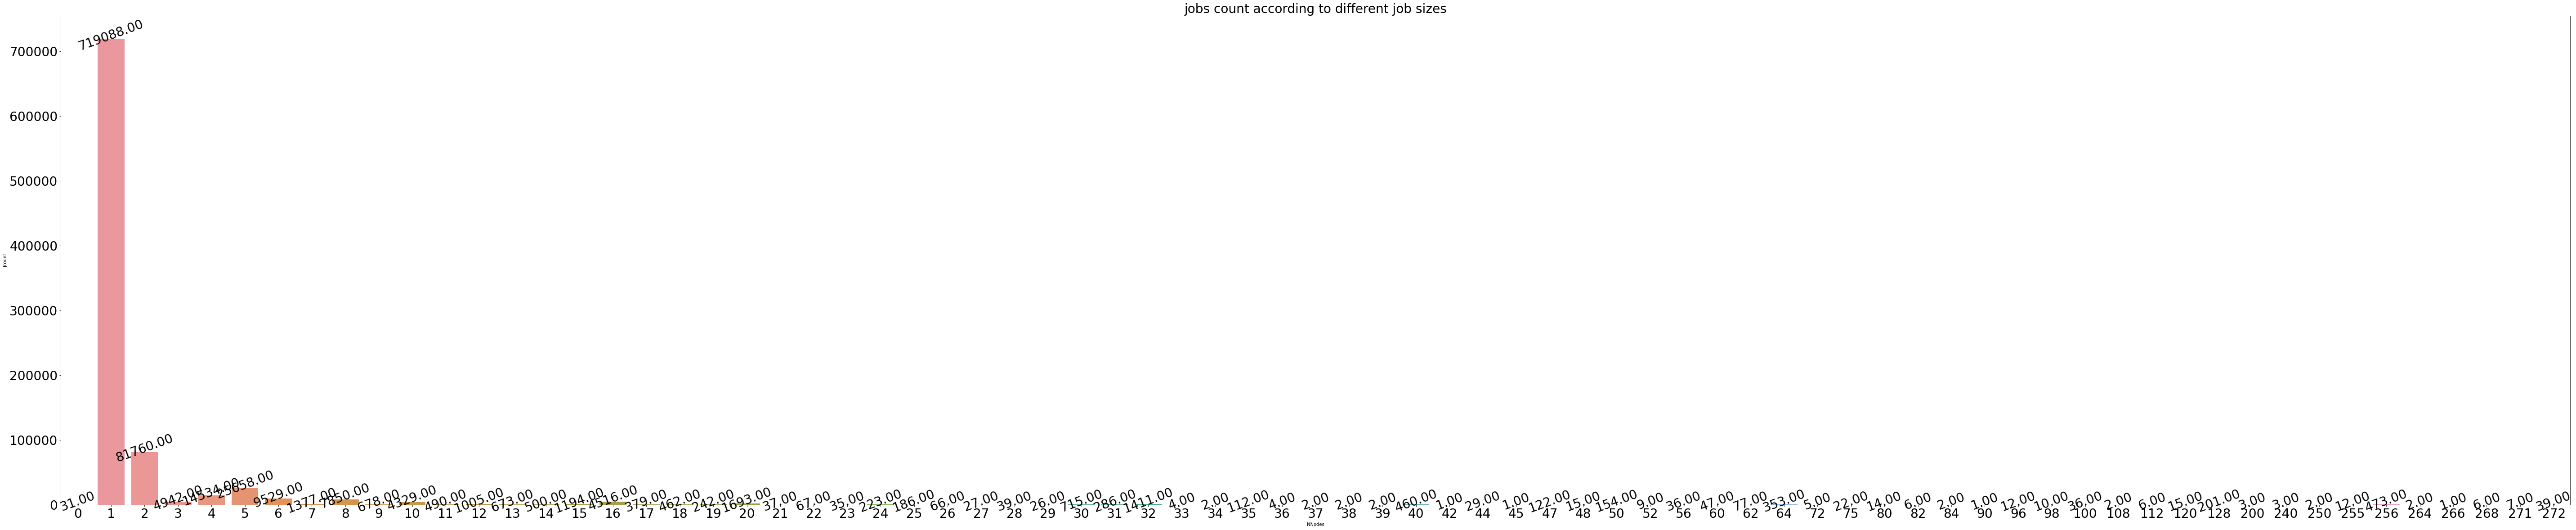

In [20]:
from pylab import rcParams
rcParams['figure.figsize'] = 100, 20
jobsize['NNodes'] = jobsize['NNodes'].apply(str)
plots = sns.barplot(x ='NNodes',y = 'Jcount',data =  jobsize)
plots.set_title('jobs count according to different job sizes',size = 28)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                    xytext=(0, 8),
                   textcoords='offset points',rotation = 20,size = 28)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
if not os.path.exists('Job_Size'):
    os.makedirs('Job_Size')
plt.savefig('Job_Size/Job_Size_1.png')

In [23]:
jobsize2 = jobsize.loc[jobsize.NNodes <= 10]

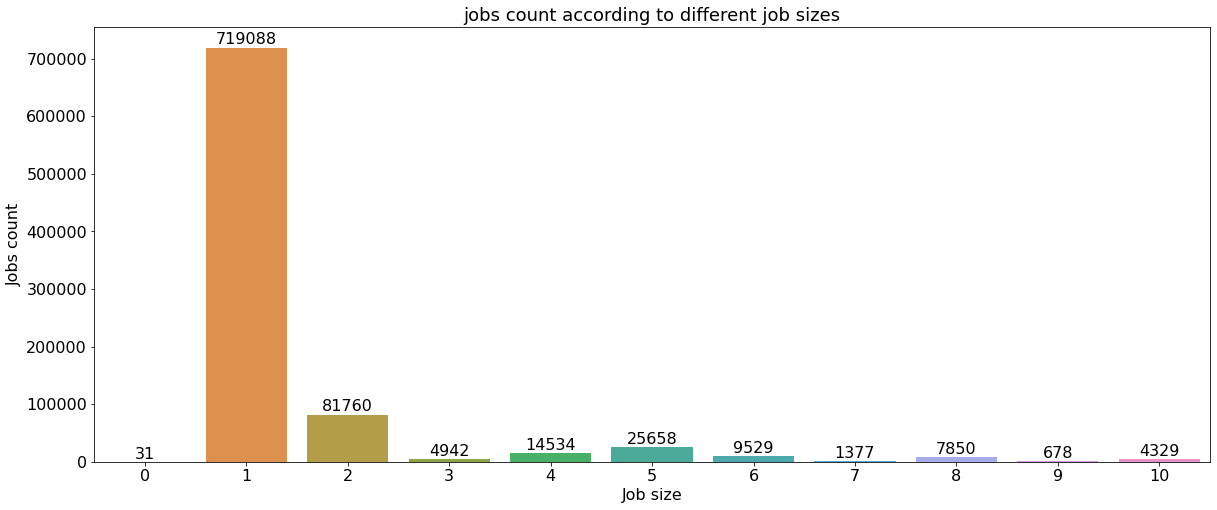

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 8
jobsize2['NNodes'] = jobsize2['NNodes'].apply(str)
plots = sns.barplot(x ='NNodes',y = 'Jcount',data =  jobsize2)
plots.set_title('jobs count according to different job sizes',size = 18)
for bar in plots.patches:
    plots.annotate(int(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                    xytext=(0, 8),
                   textcoords='offset points',rotation = 0,size = 16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Job size',size = 16)
plt.ylabel('Jobs count',size = 16)
if not os.path.exists('Job_Size'):
    os.makedirs('Job_Size')
plt.savefig('Job_Size/Job_Size_2.png')

## Job size according to QOS

In [62]:
jobsize1 = waittime.groupby(['NNodes','QOS'], as_index=False).agg({'Jcount':'sum'})

In [63]:
QOScont = jobsize1.loc[jobsize1['QOS'] == 'cont']
QOScont['QOScont'] = QOScont['Jcount']
QOScont = QOScont[['NNodes','QOScont']]

QOSnocont = jobsize1.loc[jobsize1['QOS'] == 'nocont']
QOSnocont['QOSnocont'] = QOSnocont['Jcount']
QOSnocont = QOSnocont[['NNodes','QOSnocont']]

QOSnormal = jobsize1.loc[jobsize1['QOS'] == 'normal']
QOSnormal['QOSnormal'] = QOSnormal['Jcount']
QOSnormal = QOSnormal[['NNodes','QOSnormal']]

QOSUnknown = jobsize1.loc[jobsize1['QOS'] == 'Unknown']
QOSUnknown['QOSUnknown'] = QOSUnknown['Jcount']
QOSUnknown = QOSUnknown[['NNodes','QOSUnknown']]

QOSlowcont = jobsize1.loc[jobsize1['QOS'] == 'lowcont']
QOSlowcont['QOSlowcont'] = QOSlowcont['Jcount']
QOSlowcont = QOSlowcont[['NNodes','QOSlowcont']]

In [64]:
jobsizee = jobsize1.groupby('NNodes', as_index=False).agg({'Jcount':'sum'})

In [65]:
jobsizee = pd.merge(jobsizee, QOScont, on=['NNodes'], how='left').fillna(0)
jobsizee = pd.merge(jobsizee, QOSnocont, on=['NNodes'], how='left').fillna(0)
jobsizee = pd.merge(jobsizee, QOSnormal, on=['NNodes'], how='left').fillna(0)
jobsizee = pd.merge(jobsizee, QOSUnknown, on=['NNodes'], how='left').fillna(0)
jobsizee = pd.merge(jobsizee, QOSlowcont, on=['NNodes'], how='left').fillna(0)

In [66]:
jobsizee.head()

,NNodes,Jcount,QOScont,QOSnocont,QOSnormal,QOSUnknown,QOSlowcont
0,0,31,20.0000,1.0000,10.0000,0.0000,0.0000
1,1,719088,555518.0000,81342.0000,639.0000,91.0000,81498.0000
2,2,81760,52682.0000,7392.0000,1.0000,0.0000,21685.0000
3,3,4942,3774.0000,292.0000,0.0000,0.0000,876.0000
4,4,14534,11405.0000,762.0000,60.0000,1.0000,2306.0000


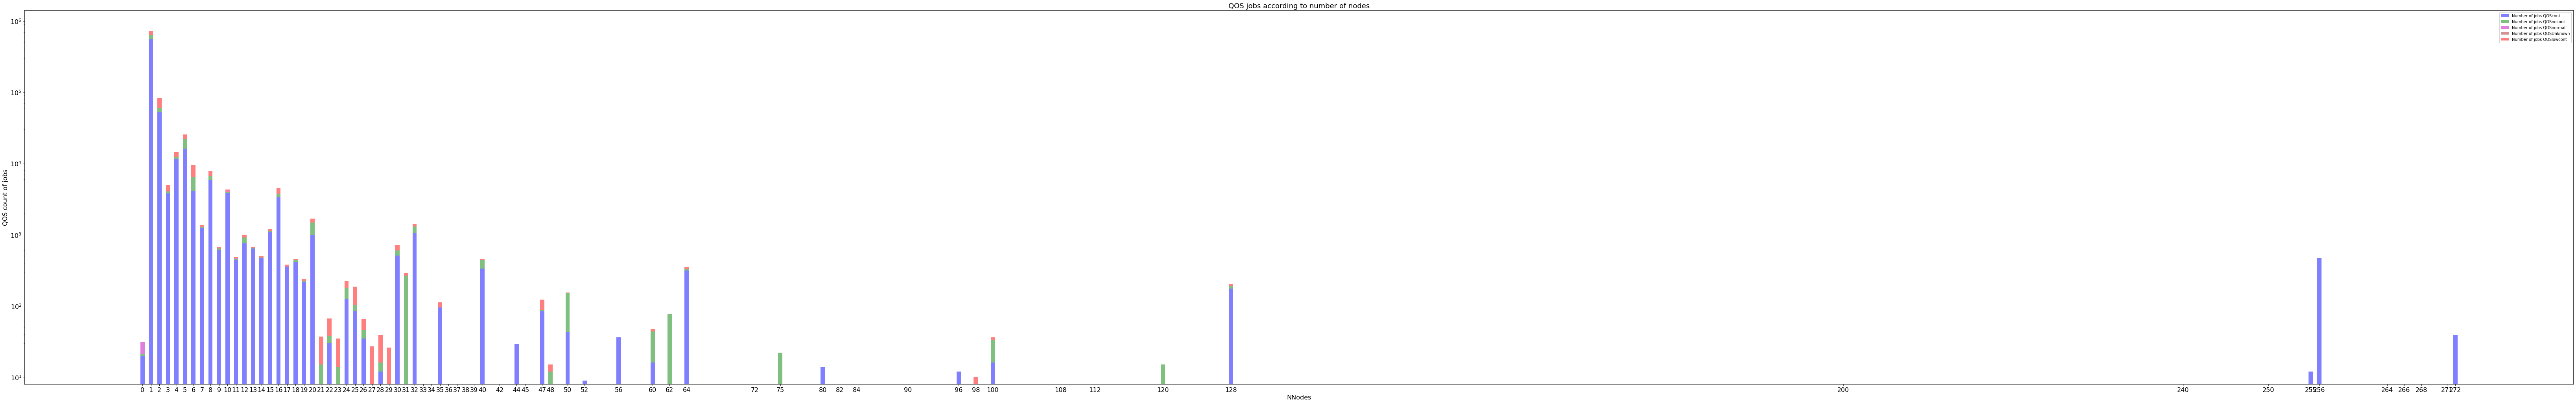

In [67]:
from pylab import rcParams
rcParams['figure.figsize'] = 100, 15
fig,ax = plt.subplots()
ax.grid(False)
ax.set_title("QOS jobs according to number of nodes",size=18)
width = .5 
        # ax.bar(l.month, l.Jcount, width, color='w', alpha = 0.8)
ax.bar(jobsizee['NNodes'], jobsizee['QOScont'], width, color='blue',alpha = 0.5)
ax.bar(jobsizee['NNodes'], jobsizee['QOSnocont'], width,bottom = jobsizee.QOScont, color='green',alpha = 0.5)
ax.bar(jobsizee['NNodes'], jobsizee['QOSnormal'], width,bottom = jobsizee.QOScont + jobsizee.QOSnocont,  color='m',alpha = 0.5)
ax.bar(jobsizee['NNodes'],jobsizee['QOSUnknown'] , width,bottom = jobsizee.QOScont + jobsizee.QOSnocont + jobsizee.QOSnormal,  color='brown',alpha = 0.5)
ax.bar(jobsizee['NNodes'], jobsizee['QOSlowcont'], width,bottom = jobsizee.QOScont + jobsizee.QOSnocont + jobsizee.QOSnormal + jobsizee.QOSUnknown,  color='r',alpha = 0.5)
        
# fig.set_figheight(12)
# fig.set_figwidth(10)
ax.set_xlabel('NNodes', fontsize=16)
ax.set_ylabel('QOS count of jobs', fontsize=16)
plt.subplots_adjust(left=0, bottom=0)
JobSizes = jobsizee['NNodes']
ax.set(xticks = jobsizee['NNodes'])
ax.set_xticklabels(JobSizes, fontsize=16)
plt.yscale('log')
for tick in ax.get_yticklabels():
    tick.set_fontsize("16")
plt.legend(["Number of jobs QOScont",'Number of jobs QOSnocont','Number of jobs QOSnormal','Number of jobs QOSUnknown','Number of jobs QOSlowcont'])
plt.show()
if not os.path.exists('Job_Size'):
    os.makedirs('Job_Size')
fig.savefig('Job_Size/Job_Size_QOS.png',bbox_inches='tight', dpi=100)

# Report purpose

In [69]:
jobsizee2 = jobsizee.loc[(jobsizee.NNodes <= 50) & (jobsizee.NNodes > 0) ]

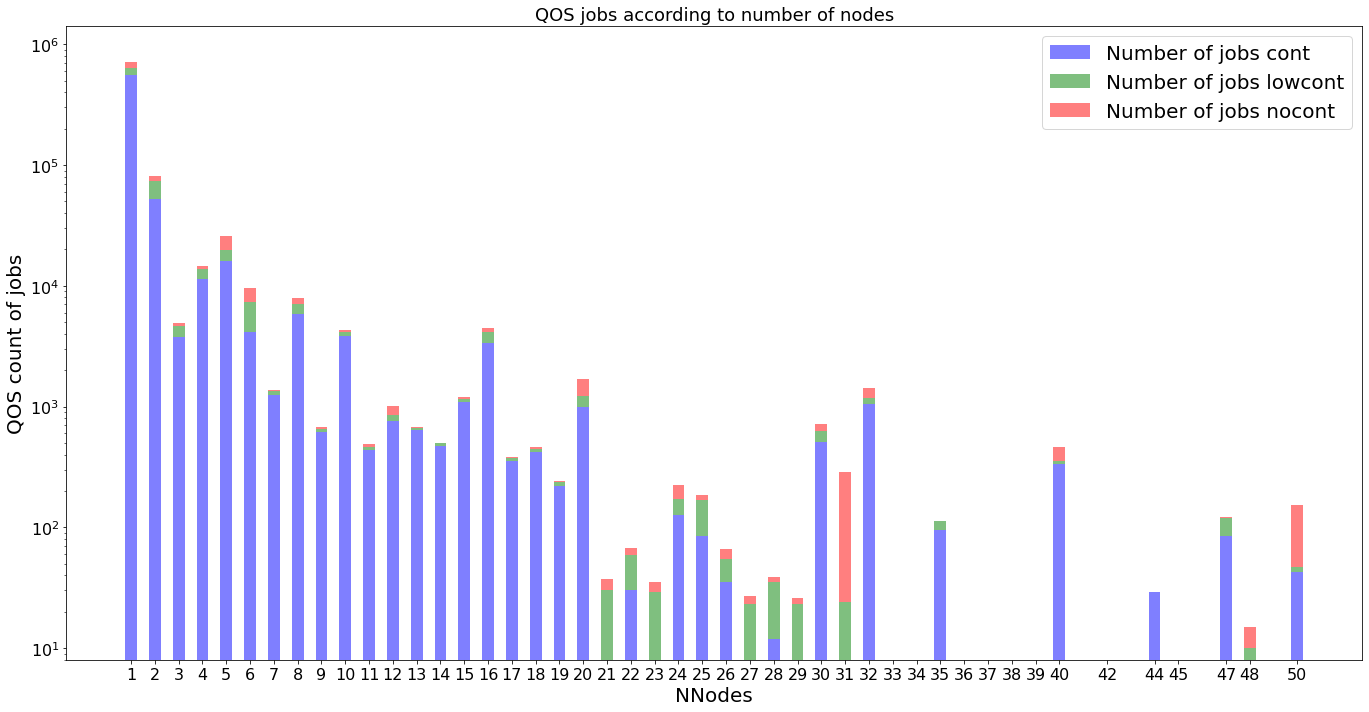

In [71]:
#Report purpose
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
fig,ax = plt.subplots()
ax.grid(False)
ax.set_title("QOS jobs according to number of nodes",size=18)
width = .5 
        # ax.bar(l.month, l.Jcount, width, color='w', alpha = 0.8)
ax.bar(jobsizee2['NNodes'], jobsizee2['QOScont'], width, color='blue',alpha = 0.5)
ax.bar(jobsizee2['NNodes'], jobsizee2['QOSlowcont'], width,bottom = jobsizee2.QOScont, color='green',alpha = 0.5)
ax.bar(jobsizee2['NNodes'], jobsizee2['QOSnocont'], width,bottom = jobsizee2.QOScont + jobsizee2.QOSlowcont,  color='r',alpha = 0.5)
        
# fig.set_figheight(12)
# fig.set_figwidth(10)
ax.set_xlabel('NNodes', fontsize=20)
ax.set_ylabel('QOS count of jobs', fontsize=20)
plt.subplots_adjust(left=0, bottom=0)
JobSizes = jobsizee2['NNodes']
ax.set(xticks = jobsizee2['NNodes'])
ax.set_xticklabels(JobSizes, fontsize=16)
plt.yscale('log')
for tick in ax.get_yticklabels():
    tick.set_fontsize("16")
plt.legend(["Number of jobs cont",'Number of jobs lowcont','Number of jobs nocont'],prop={'size': 20})
plt.show()
if not os.path.exists('Job_Size'):
    os.makedirs('Job_Size')
fig.savefig('Job_Size/Job_Size_QOS.png',bbox_inches='tight', dpi=100)

In [ ]:
jobsizee3 = jobsizee.loc[(jobsizee.NNodes > 50) & (jobsizee.NNodes <= 120) ]

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
fig,ax = plt.subplots()
ax.grid(False)
ax.set_title("QOS jobs according to number of nodes",size=18)
width = .5 
        # ax.bar(l.month, l.Jcount, width, color='w', alpha = 0.8)
ax.bar(jobsizee3['NNodes'], jobsizee3['QOScont'], width, color='blue',alpha = 0.5)
ax.bar(jobsizee3['NNodes'], jobsizee3['QOSnocont'], width,bottom = jobsizee3.QOScont, color='green',alpha = 0.5)
ax.bar(jobsizee3['NNodes'], jobsizee3['QOSnormal'], width,bottom = jobsizee3.QOScont + jobsizee3.QOSnocont,  color='m',alpha = 0.5)
ax.bar(jobsizee3['NNodes'],jobsizee3['QOSUnknown'] , width,bottom = jobsizee3.QOScont + jobsizee3.QOSnocont + jobsizee3.QOSnormal,  color='brown',alpha = 0.5)
ax.bar(jobsizee3['NNodes'], jobsizee3['QOSlowcont'], width,bottom = jobsizee3.QOScont + jobsizee3.QOSnocont + jobsizee3.QOSnormal + jobsizee3.QOSUnknown,  color='r',alpha = 0.5)
        
# fig.set_figheight(12)
# fig.set_figwidth(10)
ax.set_xlabel('NNodes', fontsize=16)
ax.set_ylabel('QOS count of jobs', fontsize=16)
plt.subplots_adjust(left=0, bottom=0)
JobSizes = jobsizee3['NNodes']
ax.set(xticks = jobsizee3['NNodes'])
ax.set_xticklabels(JobSizes, fontsize=16)
plt.yscale('log')
for tick in ax.get_yticklabels():
    tick.set_fontsize("16")
plt.legend(["Number of jobs QOScont",'Number of jobs QOSnocont','Number of jobs QOSnormal','Number of jobs QOSUnknown','Number of jobs QOSlowcont'],prop={'size': 16})
plt.show()
if not os.path.exists('Job_Size'):
    os.makedirs('Job_Size')
fig.savefig('Job_Size/Job_Size_QOS2.png',bbox_inches='tight', dpi=100)

In [ ]:
jobsizee4 = jobsizee.loc[jobsizee.NNodes >= 240 ]

In [ ]:
#report purpose
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
fig,ax = plt.subplots()
ax.grid(False)
ax.set_title("QOS jobs according to number of nodes",size=18)
width = .5 
        # ax.bar(l.month, l.Jcount, width, color='w', alpha = 0.8)
ax.bar(jobsizee4['NNodes'], jobsizee4['QOScont'], width, color='blue',alpha = 0.5)
ax.bar(jobsizee4['NNodes'], jobsizee4['QOSnocont'], width,bottom = jobsizee4.QOScont, color='green',alpha = 0.5)
ax.bar(jobsizee4['NNodes'], jobsizee4['QOSnormal'], width,bottom = jobsizee4.QOScont + jobsizee4.QOSnocont,  color='m',alpha = 0.5)
ax.bar(jobsizee4['NNodes'],jobsizee4['QOSUnknown'] , width,bottom = jobsizee4.QOScont + jobsizee4.QOSnocont + jobsizee4.QOSnormal,  color='brown',alpha = 0.5)
ax.bar(jobsizee4['NNodes'], jobsizee4['QOSlowcont'], width,bottom = jobsizee4.QOScont + jobsizee4.QOSnocont + jobsizee4.QOSnormal + jobsizee4.QOSUnknown,  color='r',alpha = 0.5)
        
# fig.set_figheight(12)
# fig.set_figwidth(10)
ax.set_xlabel('NNodes', fontsize=16)
ax.set_ylabel('QOS count of jobs', fontsize=16)
plt.subplots_adjust(left=0, bottom=0)
JobSizes = jobsizee4['NNodes']
ax.set(xticks = jobsizee4['NNodes'])
ax.set_xticklabels(JobSizes, fontsize=16)
plt.yscale('log')
for tick in ax.get_yticklabels():
    tick.set_fontsize("16")
plt.legend(["Number of jobs QOScont",'Number of jobs QOSnocont','Number of jobs QOSnormal','Number of jobs QOSUnknown','Number of jobs QOSlowcont'],prop={'size': 16})

plt.show()
if not os.path.exists('Job_Size'):
    os.makedirs('Job_Size')
fig.savefig('Job_Size/Job_Size_QOS3.png',bbox_inches='tight', dpi=100)

# Partition Analysis

## Partition count

In [34]:
jobsize2 = waittime.groupby(['NNodes','Partition'], as_index=False).agg({'Jcount':'sum'})

In [35]:
jobsize3 = waittime.groupby('Partition', as_index=False).agg({'Jcount':'sum'})

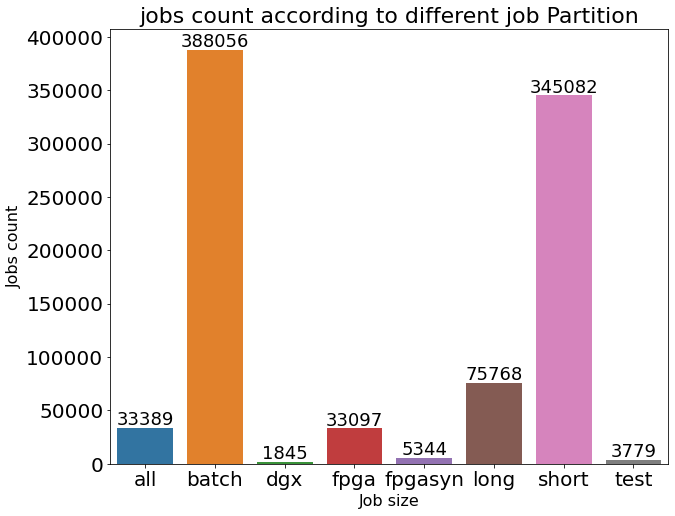

In [36]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
jobsize3['Partition'] = jobsize3['Partition'].apply(str)
plots = sns.barplot(x ='Partition',y = 'Jcount',data =  jobsize3)
plots.set_title('jobs count according to different job Partition',size = 22)
for bar in plots.patches:
    plots.annotate(int(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=18, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Job size',size = 16)
plt.ylabel('Jobs count',size = 16)
if not os.path.exists('Job_Size'):
    os.makedirs('Job_Size')
plt.savefig('Job_Size/Job_PARTITION_1.png',bbox_inches='tight', dpi=100)

## Partition according to job size

In [73]:
batch = jobsize2.loc[jobsize2['Partition'] == 'batch']
batch['batch'] = batch['Jcount']
batch = batch[['NNodes','batch']]

dgx = jobsize2.loc[jobsize2['Partition'] == 'dgx']
dgx['dgx'] = dgx['Jcount']
dgx = dgx[['NNodes','dgx']]

long = jobsize2.loc[jobsize2['Partition'] == 'long']
long['long'] = long['Jcount']
long = long[['NNodes','long']]

short = jobsize2.loc[jobsize2['Partition'] == 'short']
short['short'] = short['Jcount']
short = short[['NNodes','short']]

test = jobsize2.loc[jobsize2['Partition'] == 'test']
test['test'] = test['Jcount']
test = test[['NNodes','test']]

alll = jobsize2.loc[jobsize2['Partition'] == 'all']
alll['all'] = alll['Jcount']
alll = alll[['NNodes','all']]

fpga = jobsize2.loc[jobsize2['Partition'] == 'fpga']
fpga['fpga'] = fpga['Jcount']
fpga = fpga[['NNodes','fpga']]

fpgasyn = jobsize2.loc[jobsize2['Partition'] == 'fpgasyn']
fpgasyn['fpgasyn'] = fpgasyn['Jcount']
fpgasyn = fpgasyn[['NNodes','fpgasyn']]

In [74]:
jobsizee1 = jobsize2.groupby('NNodes', as_index=False).agg({'Jcount':'sum'})

In [75]:
jobsizee1 = pd.merge(jobsizee1, batch, on=['NNodes'], how='left').fillna(0)
jobsizee1 = pd.merge(jobsizee1, dgx, on=['NNodes'], how='left').fillna(0)
jobsizee1 = pd.merge(jobsizee1, long, on=['NNodes'], how='left').fillna(0)
jobsizee1 = pd.merge(jobsizee1, short, on=['NNodes'], how='left').fillna(0)
jobsizee1 = pd.merge(jobsizee1, test, on=['NNodes'], how='left').fillna(0)
jobsizee1 = pd.merge(jobsizee1, alll, on=['NNodes'], how='left').fillna(0)
jobsizee1 = pd.merge(jobsizee1, fpga, on=['NNodes'], how='left').fillna(0)
jobsizee1 = pd.merge(jobsizee1, fpgasyn, on=['NNodes'], how='left').fillna(0)

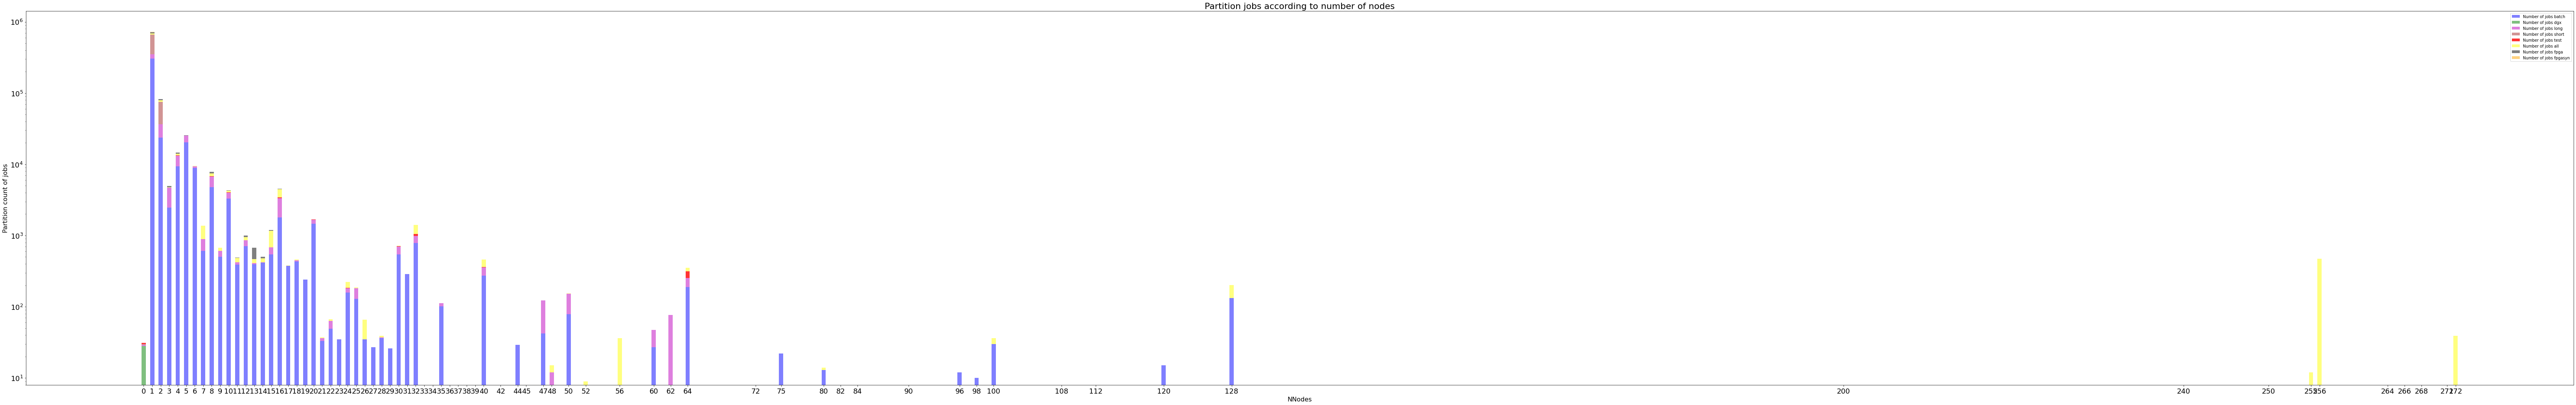

In [76]:
from pylab import rcParams
rcParams['figure.figsize'] = 100, 15
fig,ax = plt.subplots()
ax.grid(False)
ax.set_title("Partition jobs according to number of nodes",size=22)
width = .5 
        # ax.bar(l.month, l.Jcount, width, color='w', alpha = 0.8)
ax.bar(jobsizee1['NNodes'], jobsizee1['batch'], width, color='blue',alpha = 0.5)
ax.bar(jobsizee1['NNodes'], jobsizee1['dgx'], width,bottom = jobsizee1.batch, color='green',alpha = 0.5)
ax.bar(jobsizee1['NNodes'], jobsizee1['long'], width,bottom = jobsizee1.batch + jobsizee1.dgx,  color='m',alpha = 0.5)
ax.bar(jobsizee1['NNodes'],jobsizee1['short'] , width,bottom = jobsizee1.batch + jobsizee1.dgx + jobsizee1.long,  color='brown',alpha = 0.5)
ax.bar(jobsizee1['NNodes'], jobsizee1['test'], width,bottom = jobsizee1.batch + jobsizee1.dgx + jobsizee1.long + jobsizee1.short,  color='r',alpha = 0.8)
ax.bar(jobsizee1['NNodes'], jobsizee1['all'], width,bottom = jobsizee1.batch + jobsizee1.dgx + jobsizee1.long + jobsizee1.short + jobsizee1.test, color='yellow',alpha = 0.5)
ax.bar(jobsizee1['NNodes'], jobsizee1['fpga'], width,bottom = jobsizee1.batch + jobsizee1.dgx + jobsizee1.long + jobsizee1.short + jobsizee1.test + jobsizee1['all'], color='k',alpha = 0.5)
ax.bar(jobsizee1['NNodes'], jobsizee1['fpgasyn'], width,bottom = jobsizee1.batch + jobsizee1.dgx + jobsizee1.long + jobsizee1.short + jobsizee1.test + jobsizee1['all'] + jobsizee1.fpga, color='orange',alpha = 0.5)
                      
# fig.set_figheight(12)
# fig.set_figwidth(10)
ax.set_xlabel('NNodes', fontsize=16)
ax.set_ylabel('Partition count of jobs', fontsize=16)
plt.subplots_adjust(left=0, bottom=0)
JobSizes = jobsizee['NNodes']
ax.set(xticks = jobsizee['NNodes'])
ax.set_xticklabels(jobsizee['NNodes'], fontsize=18)
plt.yscale('log')
for tick in ax.get_yticklabels():
    tick.set_fontsize("18")
plt.legend(["Number of jobs batch",'Number of jobs dgx','Number of jobs long','Number of jobs short','Number of jobs test','Number of jobs all','Number of jobs fpga','Number of jobs fpgasyn'])
plt.show()
if not os.path.exists('Job_Size'):
    os.makedirs('Job_Size')
fig.savefig('Job_Size/Job_Size_Part.png',bbox_inches='tight', dpi=100)

# report purpose

In [77]:
jobsizee2 = jobsizee1.loc[(jobsizee1.NNodes <= 50) & (jobsizee1.NNodes > 0) ]

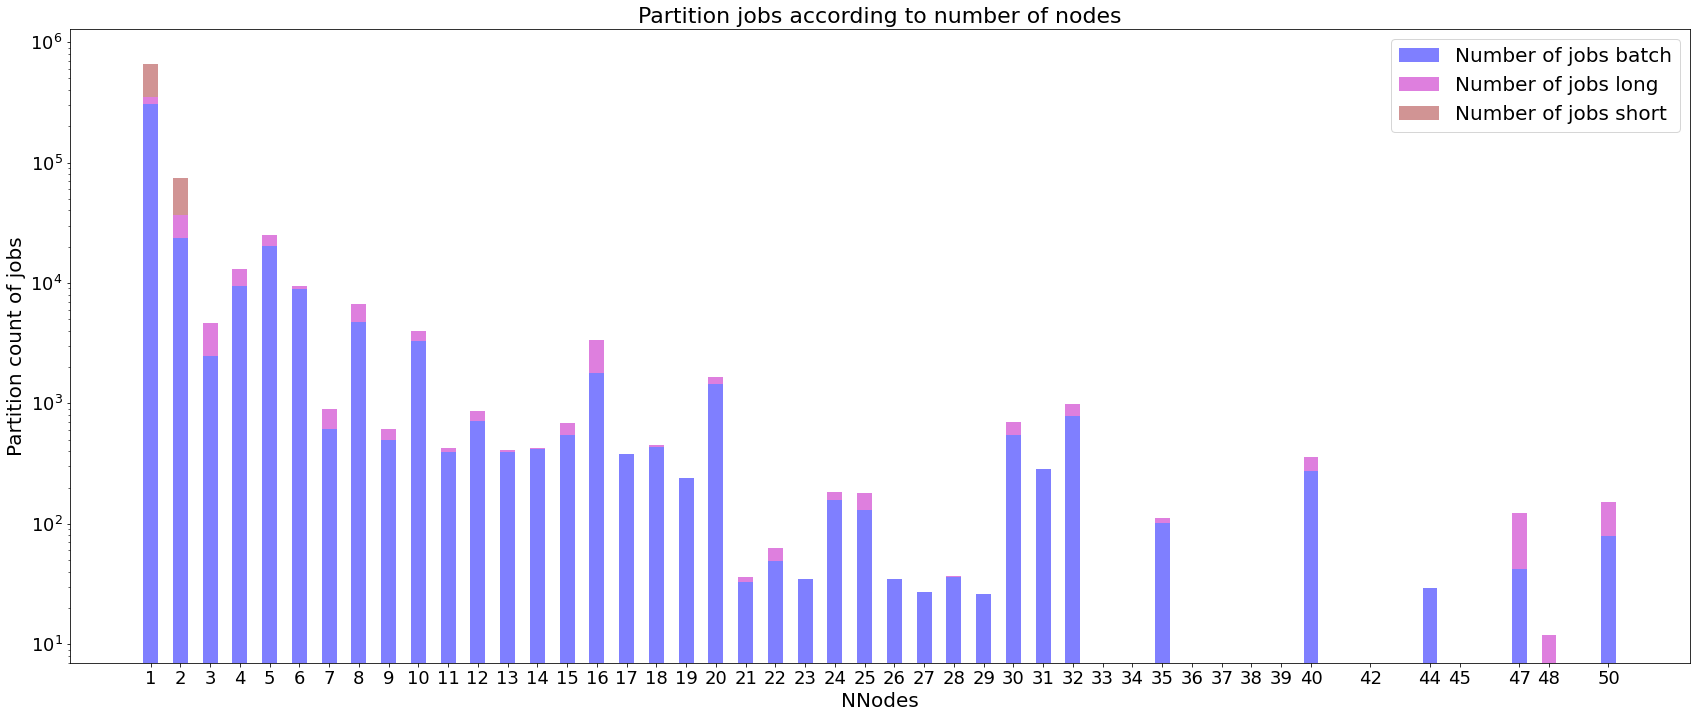

In [78]:
#report purpose
from pylab import rcParams
rcParams['figure.figsize'] = 25, 10
fig,ax = plt.subplots()
ax.grid(False)
ax.set_title("Partition jobs according to number of nodes",size=22)
width = .5 
        # ax.bar(l.month, l.Jcount, width, color='w', alpha = 0.8)
ax.bar(jobsizee2['NNodes'], jobsizee2['batch'], width, color='blue',alpha = 0.5)
ax.bar(jobsizee2['NNodes'], jobsizee2['long'], width,bottom = jobsizee2.batch,  color='m',alpha = 0.5)
ax.bar(jobsizee2['NNodes'],jobsizee2['short'] , width,bottom = jobsizee2.batch + jobsizee2.long,  color='brown',alpha = 0.5)
                      
# fig.set_figheight(12)
# fig.set_figwidth(10)
ax.set_xlabel('NNodes', fontsize=20)
ax.set_ylabel('Partition count of jobs', fontsize=20)
plt.subplots_adjust(left=0, bottom=0)
JobSizes = jobsizee2['NNodes']
ax.set(xticks = jobsizee2['NNodes'])
ax.set_xticklabels(jobsizee2['NNodes'], fontsize=18)
plt.yscale('log')
for tick in ax.get_yticklabels():
    tick.set_fontsize("18")
plt.legend(["Number of jobs batch",'Number of jobs long','Number of jobs short'],prop={'size': 20})
plt.show()
if not os.path.exists('Job_Size'):
    os.makedirs('Job_Size')
fig.savefig('Job_Size/Job_Size_Part1.png',bbox_inches='tight', dpi=100)

In [ ]:
jobsizee3 = jobsizee1.loc[(jobsizee1.NNodes > 50) & (jobsizee1.NNodes < 128) ]

In [ ]:
#report purpose
from pylab import rcParams
rcParams['figure.figsize'] = 25, 10
fig,ax = plt.subplots()
ax.grid(False)
ax.set_title("Partition jobs according to number of nodes",size=22)
width = .5 
        # ax.bar(l.month, l.Jcount, width, color='w', alpha = 0.8)
ax.bar(jobsizee3['NNodes'], jobsizee3['batch'], width, color='blue',alpha = 0.5)
ax.bar(jobsizee3['NNodes'], jobsizee3['dgx'], width,bottom = jobsizee3.batch, color='green',alpha = 0.5)
ax.bar(jobsizee3['NNodes'], jobsizee3['long'], width,bottom = jobsizee3.batch + jobsizee3.dgx,  color='m',alpha = 0.5)
ax.bar(jobsizee3['NNodes'],jobsizee3['short'] , width,bottom = jobsizee3.batch + jobsizee3.dgx + jobsizee3.long,  color='brown',alpha = 0.5)
ax.bar(jobsizee3['NNodes'], jobsizee3['test'], width,bottom = jobsizee3.batch + jobsizee3.dgx + jobsizee3.long + jobsizee3.short,  color='r',alpha = 0.8)
ax.bar(jobsizee3['NNodes'], jobsizee3['all'], width,bottom = jobsizee3.batch + jobsizee3.dgx + jobsizee3.long + jobsizee3.short + jobsizee3.test, color='yellow',alpha = 0.5)
ax.bar(jobsizee3['NNodes'], jobsizee3['fpga'], width,bottom = jobsizee3.batch + jobsizee3.dgx + jobsizee3.long + jobsizee3.short + jobsizee3.test + jobsizee3['all'], color='k',alpha = 0.5)
ax.bar(jobsizee3['NNodes'], jobsizee3['fpgasyn'], width,bottom = jobsizee3.batch + jobsizee3.dgx + jobsizee3.long + jobsizee3.short + jobsizee3.test + jobsizee3['all'] + jobsizee3.fpga, color='orange',alpha = 0.5)
                      
# fig.set_figheight(12)
# fig.set_figwidth(10)
ax.set_xlabel('NNodes', fontsize=18)
ax.set_ylabel('Partition count of jobs', fontsize=18)
plt.subplots_adjust(left=0, bottom=0)
JobSizes = jobsizee3['NNodes']
ax.set(xticks = jobsizee3['NNodes'])
ax.set_xticklabels(jobsizee3['NNodes'], fontsize=18)
plt.yscale('log')
for tick in ax.get_yticklabels():
    tick.set_fontsize("18")
plt.legend(["Number of jobs batch",'Number of jobs dgx','Number of jobs long','Number of jobs short','Number of jobs test','Number of jobs all','Number of jobs fpga','Number of jobs fpgasyn'],prop={'size': 18})
plt.show()
if not os.path.exists('Job_Size'):
    os.makedirs('Job_Size')
fig.savefig('Job_Size/Job_Size_Part2.png',bbox_inches='tight', dpi=100)

In [ ]:
jobsizee4 = jobsizee1.loc[jobsizee1.NNodes >= 240 ]

In [ ]:
#report purpose
from pylab import rcParams
rcParams['figure.figsize'] = 25, 10
fig,ax = plt.subplots()
ax.grid(False)
ax.set_title("Partition jobs according to number of nodes",size=22)
width = .5 
        # ax.bar(l.month, l.Jcount, width, color='w', alpha = 0.8)
ax.bar(jobsizee4['NNodes'], jobsizee4['batch'], width, color='blue',alpha = 0.5)
ax.bar(jobsizee4['NNodes'], jobsizee4['dgx'], width,bottom = jobsizee4.batch, color='green',alpha = 0.5)
ax.bar(jobsizee4['NNodes'], jobsizee4['long'], width,bottom = jobsizee4.batch + jobsizee4.dgx,  color='m',alpha = 0.5)
ax.bar(jobsizee4['NNodes'],jobsizee4['short'] , width,bottom = jobsizee4.batch + jobsizee4.dgx + jobsizee4.long,  color='brown',alpha = 0.5)
ax.bar(jobsizee4['NNodes'], jobsizee4['test'], width,bottom = jobsizee4.batch + jobsizee4.dgx + jobsizee4.long + jobsizee4.short,  color='r',alpha = 0.8)
ax.bar(jobsizee4['NNodes'], jobsizee4['all'], width,bottom = jobsizee4.batch + jobsizee4.dgx + jobsizee4.long + jobsizee4.short + jobsizee4.test, color='yellow',alpha = 0.5)
ax.bar(jobsizee4['NNodes'], jobsizee4['fpga'], width,bottom = jobsizee4.batch + jobsizee4.dgx + jobsizee4.long + jobsizee4.short + jobsizee4.test + jobsizee4['all'], color='k',alpha = 0.5)
ax.bar(jobsizee4['NNodes'], jobsizee4['fpgasyn'], width,bottom = jobsizee4.batch + jobsizee4.dgx + jobsizee4.long + jobsizee4.short + jobsizee4.test + jobsizee4['all'] + jobsizee4.fpga, color='orange',alpha = 0.5)
                      
# fig.set_figheight(12)
# fig.set_figwidth(10)
ax.set_xlabel('NNodes', fontsize=18)
ax.set_ylabel('Partition count of jobs', fontsize=18)
plt.subplots_adjust(left=0, bottom=0)
JobSizes = jobsizee4['NNodes']
ax.set(xticks = jobsizee4['NNodes'])
ax.set_xticklabels(jobsizee4['NNodes'], fontsize=18)
plt.yscale('log')
for tick in ax.get_yticklabels():
    tick.set_fontsize("18")
plt.legend(["Number of jobs batch",'Number of jobs dgx','Number of jobs long','Number of jobs short','Number of jobs test','Number of jobs all','Number of jobs fpga','Number of jobs fpgasyn'],prop={'size': 18})
plt.show()
if not os.path.exists('Job_Size'):
    os.makedirs('Job_Size')
fig.savefig('Job_Size/Job_Size_Part3.png',bbox_inches='tight', dpi=100)

# Exit Code Analysis

In [ ]:
slurmex = waittime[['ExitCode','State','Jcount','Waittime']]
slurmex = slurmex.groupby(['ExitCode','State'], as_index=False).agg({'Jcount':'sum'})
select = ["by"]
statetype1 = slurmex[slurmex.State.str.contains('|'.join(select),regex = False)]
statetype1.loc[statetype1['State'].str.contains('by'), 'State'] = 'CANCELLED BY'
statetype1 = statetype1.groupby(['ExitCode','State'], as_index=False).agg({'Jcount':'sum'})
statetype2 = slurmex.loc[slurmex.State == 'CANCELLED']
statetype3 = slurmex.loc[slurmex.State == 'TIMEOUT']
statetype4 = slurmex.loc[slurmex.State == 'NODE_FAIL']
statetype5 = slurmex.loc[slurmex.State == 'FAILED']
statetype6 = slurmex.loc[slurmex.State == 'COMPLETED']
statetype7 = slurmex.loc[slurmex.State == 'RUNNING']
statetype8 = slurmex.loc[slurmex.State == 'OUT_OF_MEMORY']


In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 12
f,axes = plt.subplots(2, 2)
x = sns.barplot(x ='ExitCode',y = 'Jcount',data =  statetype1, ax = axes[0,0])
x.set_title('Exit codes and number of jobs which are Cancelled by',fontsize=10)
y = sns.barplot(x ='ExitCode',y = 'Jcount',data =  statetype2, ax = axes[0,1])
y.set_title('Exit codes and number of jobs which are Cancelled',fontsize=10)
z = sns.barplot(x ='ExitCode',y = 'Jcount',data =  statetype3, ax = axes[1,0])
z.set_title('Exit codes and number of jobs which are Timeout',fontsize=10)
w = sns.barplot(x ='ExitCode',y = 'Jcount',data =  statetype8, ax = axes[1,1])
w.set_title('Exit codes and number of jobs which are Out of memory',fontsize=10)
for bar in x.patches:
    x.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
for bar in y.patches:
    y.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
for bar in z.patches:
    z.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
for bar in w.patches:
    w.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.subplots_adjust(wspace=0.39, top=0.85, bottom=0.1, left=0.18, right=0.95)
if not os.path.exists('Exit_code_analysis'):
    os.makedirs('Exit_code_analysis')
plt.savefig('Exit_code_analysis/Exit_code_analysis 1.png')

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 12
f,axes = plt.subplots(1, 2)
x = sns.barplot(x ='ExitCode',y = 'Jcount',data =  statetype6, ax = axes[0])
x.set_title('Exit codes and number of jobs which are Completed',size = 16)
y = sns.barplot(x ='ExitCode',y = 'Jcount',data =  statetype7, ax = axes[1])
y.set_title('Running',size = 16)
for bar in x.patches:
    x.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
for bar in y.patches:
    y.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.subplots_adjust(wspace=10.99, top=0.85, bottom=0.1, left=0.18, right=0.95)
if not os.path.exists('Exit_code_analysis'):
    os.makedirs('Exit_code_analysis')
plt.savefig('Exit_code_analysis/Exit_code_analysis 2.png')

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 10
y = sns.barplot(x ='ExitCode',y = 'Jcount',data =  statetype4)
y.set_title("Exit codes and number of jobs which are Node Fail")
for bar in y.patches:
    y.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
if not os.path.exists('Exit_code_analysis'):
    os.makedirs('Exit_code_analysis')
plt.savefig('Exit_code_analysis/Exit_code_analysis 3.png')

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 100, 20
y = sns.barplot(x ='ExitCode',y = 'Jcount',data =  statetype5)
y.set_title("Exit codes and number of jobs which are Failed Jobs",size = 22)
y.set_xticklabels(statetype5['ExitCode'], fontsize=16)
for tick in y.get_yticklabels():
    tick.set_fontsize("16")

for bar in y.patches:
    y.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=20, xytext=(0, 8),
                   textcoords='offset points')
if not os.path.exists('Exit_code_analysis'):
    os.makedirs('Exit_code_analysis')
plt.savefig('Exit_code_analysis/Exit_code_analysis 4.png')

# QOS Analysis

## QOS jobcount and mean waittime

In [ ]:
QOS = waittime.groupby(['QOS','QOSRAW'], as_index=False).agg({'Waittime':'mean','Jcount':'sum'})
QOS['QOSRAW'] = QOS['QOSRAW'].astype(int)

In [ ]:
QOS['perjob'] = QOS['Waittime'] / QOS['Jcount']
QOS

In [ ]:
QOS['QOS'] = QOS['QOS'] + '-' + QOS['QOSRAW'].astype(str)

In [ ]:
QOS

In [ ]:
QOS.set_index('QOS', inplace=True)

In [ ]:
QOS

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
plots = sns.barplot(x ='QOS',y = 'Jcount',data = QOS)
plots.set_title('jobs count according to QoS',size = 22)
for bar in plots.patches:
    plots.annotate(int(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=18, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('QoS',size = 16)
plt.ylabel('Jobs count',size = 16)
if not os.path.exists('Job_Size'):
    os.makedirs('Job_Size')
plt.savefig('Job_Size/Job_QOS.png',bbox_inches='tight', dpi=100)

In [ ]:
index = QOS.index
column0 = QOS['Waittime']
column1 = QOS['Jcount']
title0 = 'Mean Waittime in seconds for different QOS classes'
title1 = 'Job count for different QOS classes'

In [ ]:
rcParams['figure.figsize'] = 15, 8
fig, axes = plt.subplots(ncols=2, sharey=True)
fig.tight_layout()
axes[1].barh(index, column0, align='center', zorder=10)
axes[1].set_title(title0, fontsize=16, pad=15)
axes[0].barh(index, column1, align='center', zorder=10)
axes[0].set_title(title1, fontsize=16, pad=15)

for i in axes[1].patches:
    axes[1].text(i.get_width()+.1, i.get_y()+.3,str(round((i.get_width()),2)), fontsize=14, color='dimgrey')
for i in axes[0].patches:
    axes[0].text(i.get_width()+.1, i.get_y()+.3,str(round((i.get_width()), 2)), fontsize=14, color='dimgrey', ha='left', va='center')
plt.gca().invert_yaxis()
plt.subplots_adjust(wspace=0.09, top=0.85, bottom=0.1, left=0.18, right=0.95)
if not os.path.exists('QOS_analysis'):
    os.makedirs('QOS_analysis')
plt.savefig('QOS_analysis/QOS_analysis 1.png')

# Job States Analysis

## Mean timelimit and job count for states cancelled and timeout

In [ ]:
waittime2 = waittime[['Waittime','State','Jcount','TimelimitRaw']]
waittime3 = waittime2.groupby('State', as_index=False).agg({'Waittime':'sum','Jcount':'sum','TimelimitRaw':'mean'})

In [ ]:
js = waittime[['State','Jcount','TimelimitRaw','NNodes','JobLen','AllocCPUS']]

In [ ]:
js2 = js.loc[(js.State == 'CANCELLED') | (js.State == 'TIMEOUT')]

In [ ]:
js3 = js2.loc[js2.State == 'CANCELLED']

In [ ]:
js3 = js2.groupby('State', as_index=False).agg({'TimelimitRaw':'mean','Jcount':'sum','AllocCPUS':lambda x: x.mode()})

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
f,axes = plt.subplots(1, 2)
h= sns.barplot(x ='State',y = 'TimelimitRaw',data =  js3, ax = axes[0])
h.set_title('Mean Timelimit in minutes for the job states',size = 14)
f=sns.barplot(x ='State',y = 'Jcount',data =  js3, ax = axes[1])
f.set_title('Total jobs for the different job states',size = 14)
metrics = 'Allocated CPUS = 1'
f.text(-0.5, 10000, metrics)
for bar in f.patches:
    f.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
for bar in h.patches:
    h.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.subplots_adjust(wspace=0.39, top=0.85, bottom=0.1, left=0.18, right=0.95)
if not os.path.exists('Job_state_analysis'):
    os.makedirs('Job_state_analysis')
plt.savefig('Job_state_analysis/Job_state_analysis 2.png')

## Job state count of jobs and mean waittime

In [ ]:
select = ["by"]
Statetype1 = waittime3[waittime3.State.str.contains('|'.join(select),regex = False)]
Statetype1.loc[Statetype1['State'].str.contains('by'), 'State'] = 'CANCELLED BY'
Statetype1 = Statetype1.groupby('State', as_index=False).agg({'Waittime':'mean','Jcount':'sum'})
Statetype2 = waittime3.loc[waittime3.State == 'CANCELLED']
Statetype3 = waittime3.loc[waittime3.State == 'TIMEOUT']
Statetype4 = waittime3.loc[waittime3.State == 'NODE_FAIL']
Statetype5 = waittime3.loc[waittime3.State == 'FAILED']
Statetype6 = waittime3.loc[waittime3.State == 'COMPLETED']
Statetype7 = waittime3.loc[waittime3.State == 'RUNNING']
Statetype8 = waittime3.loc[waittime3.State == 'OUT OF MEMORY']
Statetypes = [Statetype1,Statetype2,Statetype3,Statetype4,Statetype5,Statetype6,Statetype7,Statetype8]
Statetype = pd.concat(Statetypes)

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 25, 10
f,axes = plt.subplots(1, 2)
h= sns.barplot(x ='State',y = 'Waittime',data =  Statetype, ax = axes[0])
h.set_title('Mean waittime for the job states',size = 22)
f=sns.barplot(x ='State',y = 'Jcount',data =  Statetype, ax = axes[1])
f.set_title('Total jobs for the different job states',size = 22)
for bar in f.patches:
    f.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=14, xytext=(0, 8),
                   textcoords='offset points')
for bar in h.patches:
    h.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=16, xytext=(0, 8),
                   textcoords='offset points')
if not os.path.exists('Job_state_analysis'):
    os.makedirs('Job_state_analysis')
plt.savefig('Job_state_analysis/Job_state_analysis 1.png')